<a href="https://colab.research.google.com/github/raiannysoares/analise_de_agradecimentos/blob/main/analise_agradecimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#pacotes utilizados
import pandas as pd
from wordcloud import WordCloud

In [45]:
dados = pd.read_csv('/content/PresentlyBackup2023-02-27T15-19-50.csv')
dados.head()
dados.tail

<bound method NDFrame.tail of       entryDate                                       entryContent
0    2023-02-26  • Por ter assistido série \n• Por minha famíli...
1    2023-02-25  • Por ter estudado \n• Por tá bem\n• Por ter c...
2    2023-02-24  • Por ter voltado pro jiu-jitsu \n• Por ter pe...
3    2023-02-23  • Por ter comido churros\n• Por ter estudado\n...
4    2023-02-22  • Por tá desenvolvendo meu projeto\n• Por ter ...
..          ...                                                ...
589  2021-07-05  • Pelo primeiro dia de estágio\n• Por mais uma...
590  2021-07-04  • Pela minha igreja\n• Pela minha educação\n• ...
591  2021-07-03  • Por ter achado minhas roupinhas\n• Pela viaj...
592  2021-07-02  • Por ter dado certo a documentação do estágio...
593  2021-07-01  • Conforto de casa\n• Educação por meio do cel...

[594 rows x 2 columns]>

In [50]:
dados.columns = ['data', 'agradecimentos']
dados.head()

,data,agradecimentos
0,2023-02-26,• Por ter assistido série \n• Por minha famíli...
1,2023-02-25,• Por ter estudado \n• Por tá bem\n• Por ter c...
2,2023-02-24,• Por ter voltado pro jiu-jitsu \n• Por ter pe...
3,2023-02-23,• Por ter comido churros\n• Por ter estudado\n...
4,2023-02-22,• Por tá desenvolvendo meu projeto\n• Por ter ...


In [51]:
limpeza = dados['agradecimentos'].str.replace('•','').replace('Por','')
limpeza.head()

0     Por ter assistido série \n Por minha família ...
1     Por ter estudado \n Por tá bem\n Por ter comi...
2     Por ter voltado pro jiu-jitsu \n Por ter pess...
3     Por ter comido churros\n Por ter estudado\n P...
4     Por tá desenvolvendo meu projeto\n Por ter do...
Name: agradecimentos, dtype: object

In [57]:
def corrigir_nomes(nome):
    nome = nome.replace('•','').replace('Por', '').replace('\n', '').replace('ter', '').replace('pelo', '').replace('pela', '').replace('Pela', '').replace('Pelo', '').replace('de', '')
    return nome

In [58]:
limpeza2 = dados['agradecimentos'].apply(corrigir_nomes)
limpeza2.head()

0       assistido série   minha família tá bem   co...
1                 estudado   tá bem   comido peixinho 
2       voltado pro jiu-jitsu    pessoas que gostam...
3                    comido churros   estudado  tá bem
4      tá senvolvendo meu projeto   dormido bem  ai...
Name: agradecimentos, dtype: object

In [59]:
# Juntar todas as palavras

# Variavel que irá juntar todas as palavras
Concatenar_todas_palavras = ''

# Loop na coluna Palavras
for Palavra in limpeza2:
  # Concatenando todas as palavras com um "espaço"
  Concatenar_todas_palavras = Concatenar_todas_palavras + ' ' + Palavra

# Verificando nossa variavel
Concatenar_todas_palavras

"    assistido série   minha família tá bem   conversado mais com Nathan     estudado   tá bem   comido peixinho     voltado pro jiu-jitsu    pessoas que gostam  mim    Nathan pra compartilhar a vida comigo    comido churros   estudado  tá bem   tá senvolvendo meu projeto   dormido bem  ainda  esperanças    feriadão   tá bem    estudado    melhorado da barriga   minha família tá bem   ainda  esperanças     scansado   tá bem    comido bem     ido comer churrasco   tá bem   dormido bem    estudado   tá bem   falado com Nathan     dado certo o grupo  estudos   tá bem  tá motivada     começado a estudar inglês novamente   voltar a treinar  tá bem    tá bem   scansado    a chance  recusar trabalhos incertos     scansado    comido camarão   tá bem     arrumado o quarto  tá bem  minha família tá com saú     conseguido meu primeiro emprego    ganhado um perfume   tá bem    me saído bem na entrevista  emprego  aniversário  Nathan   tá bem    reencontrado o pessoal da UFRN   colocado minha placa

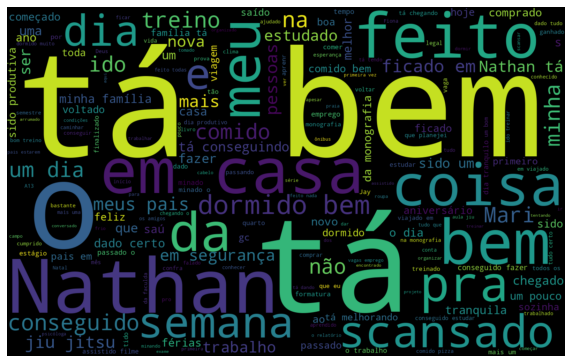

In [60]:
# Fazendo o Plot

# Gerar Nuvem de Palavras
Nuvem_Duvida = WordCloud(
    background_color='black',
    width=1600,
    height=1000
).generate( Concatenar_todas_palavras )

# Criar o gráfico
fig, ax = plt.subplots( figsize=(10, 7) )
ax.imshow( Nuvem_Duvida, interpolation='bilinear' )
ax.set_axis_off()